In [1]:
###PROGRAMME FINAL###
## Reconstruction d'images de tomographie X en Python

###DEFINITION DES BIBLIOTHEQUES###
import tomopy
import dxchange
import matplotlib.pyplot as plt
import datetime
import time
import cv2
import numpy as np
import glob
from imagestacks import create_animation
from IPython.core.display import HTML
from PIL import Image, ImageFilter
get_ipython().run_line_magic('matplotlib', 'inline')
import skimage
from skimage.transform import iradon
from skimage.transform import radon
from skimage.exposure import rescale_intensity

astropy module not found


In [2]:
fname = '/Users/leapommier/Desktop/projet multi/tilt_0_180/carteSD120321_0000.tif'
ind = [i+1 for i in range(181)]
print(ind)
print(fname)
start = datetime.datetime.now()
proj = dxchange.reader.read_tiff_stack(fname, ind)
end = datetime.datetime.now() 
duree = end - start #Pour mesurer le temps mis pour effectuer la ligne proj
print(duree)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181]
/Users/leapommier/Desktop/projet multi/tilt_0_180/carteSD120321_0000.tif
0:00:01.328321


avant (181, 1388, 1038)
apres (181, 694, 519)


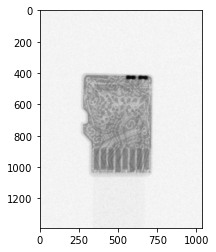

In [3]:
#diminuer la taille des images
print('avant',proj.shape)
down = tomopy.misc.morph.downsample(proj, level=1, axis=1)#axe 1 lignes: faire la moyenne des pixels 2 à 2
down = tomopy.misc.morph.downsample(down, level=1, axis=2)# axe 2 colonnes: faire la moyenne des pixels 2 à 2
#Avec axe 0 on aurait pris l'image complète qu'on aurait moyener avec tous les tilts ce qui aurait eu un rendu flou
print('apres',down.shape)

#afficher la  1ere image avant downsampling
image0 = proj[0, :, :]#image zéro, on prend tous les pixels horizontaux et verticaux: toute la matrice des pixels
plt.imshow(image0, cmap='Greys_r')
plt.show()


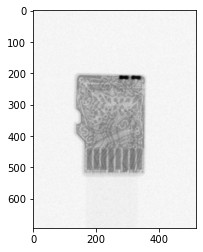

In [4]:
#afficher la  1ere image apres downsampling
image0 = down[0, :, :]
plt.imshow(image0, cmap='Greys_r')
plt.show()

In [6]:
#Pour faire afficher les images les unes après l'autre
yxratio=proj.shape[2]/proj.shape[1]
anim2 = create_animation(down,4,4/yxratio)
display(HTML(anim2.to_jshtml()))


TypeError: create_animation() takes 2 positional arguments but 3 were given

In [ ]:
#Ouverture de l'image à traiter
image = cv2.imread('nom de votre image') # lire l'image 
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY ) # convertir BGR en RGB permet d'avoir sur 1 pixel une seule couleur et pas 3 
plt.imshow(image2,cmap='gray') #converti en GRAY 

In [ ]:
figure_size = 9 # les dimension de l'axe x and y du noyau.
new_image = cv2.blur(image2,(figure_size, figure_size)) #Filtre blur (flou)
plt.figure(figsize=(11,6))

In [ ]:
#Affiche l'image d'origine et l'image après filtrage
plt.subplot(121),plt.imshow(image2,cmap='gray'),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(new_image, cmap='gray'),plt.title('filtre_blur')
plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
#Initialisation
i=0
dossier = 'Mettre le chemin de la première image du dossier'
num_image = [] #on definit des listes qui serviront à tracer les courbes


In [ ]:
#Bloucle pour traiter tout les images avec le filtre
for image in glob.glob(dossier+"/*.tif"):
    print('-----------------')
    print('image n°: ',i)
    num_image.append(i)#ajouter à la liste num_image
    img = cv2.imread(image)# lire l'image
    gaussian= cv2.GaussianBlur(img,(5,5),5) #Filtre GaussianBlur (flou gaussien suit une loi gaussienne)
    
    #Permet d'enregistrer les images filtrées
    cv2.imwrite("Chemin du dossier créé pour y mettre les images traitées/+nom de l'image%i.tif"%i,gaussian)
    
    i+= 1


In [ ]:
ang = tomopy.angles(180) # Genere des angles de 0° à 180°
rot_center = tomopy.find_center(down, ang, init=None, ind=0, tol=0.5)
print(rot_center)


In [ ]:
down2 = tomopy.misc.morph.downsample(proj, level=1, axis=1)#axe 1 lignes: faire la moyenne des pixels 2 à 2
down2 = tomopy.misc.morph.downsample(down2, level=1, axis=2)

In [ ]:
#Permet de vérifier le centre de rotation
#Trace deux lignes: 1-vertical représentant le centre de rotation. 
#2-horizontal: repere pour vérifier si un détail tourne bien à la meme distance du centre de rotation lors des differents angles. 

for k in range(180):
    
    down2[k, :, :]= cv2.line(down2[k, :, :], (int(rot_center),0),(int(rot_center),700), (255,255,255),6) #tracé de la ligne pour verifier le centre de rotation
    down2[k, :, :]= cv2.line(down2[k, :, :], (0,400),(500,400), (255,255,255),2) #verif perpendicularité axe rotation

#permet d'afficher l'image avec la verification
plt.imshow(image0, cmap='Greys_r') 
plt.show()


In [ ]:
#Animation pour vérifier la symétrie d'un détail par rapport à l'axe de rotation
yxratio=down2.shape[2]/down2.shape[1]
anim2 = create_animation(down2, size=4,4/yxratio)
display(HTML(anim2.to_jshtml()))

In [ ]:
#normaliser avec loi log pour loi de beer lambert
norm = tomopy.prep.normalize.minus_log(down, ncore=None, out=None)


#afficher la  1ere image normalisee
image0 = norm[0, :, :]
plt.imshow(image0, cmap='Greys_r')
plt.show()

In [ ]:
rec = tomopy.recon(norm, ang, center=rot_center, algorithm='gridrec') 
# Reconstruction objet avec prise en compte du centre de rotation.

In [ ]:
#Afficher l'image 256
plt.imshow(rec[256,:,:])
plt.show()

In [ ]:
yxratio=rec.shape[2]/rec.shape[1]
anim2 = create_animation(rec, size=4,4/yxratio)
display(HTML(anim2.to_jshtml()))

In [ ]:
rec2 = tomopy.recon(norm, ang, center=rot_center, algorithm='fbp',filter_name='hamming') 
plt.imshow(rec2[256,:,:])
plt.show()
yxratio=rec2.shape[2]/rec2.shape[1]
anim2 = create_animation(rec2, size=4,4/yxratio)
display(HTML(anim2.to_jshtml()))


In [ ]:
# Utilisation d'AstraToolBox avec des algorithmes itératifs
# Filtered backprojection en itératif

options={'proj_type': 'linear', 'method': 'FBP', 'num_iter':180}
#Reconstruction avec Astra Toolbox à partir des options décrites au dessus
recon=tomopy.recon(proj,ang,center=rot_center,algorithm=tomopy.astra, options=options, ncore=1)
recon=tomopy.circ_mask(recon,axis=0, ratio=0.95) #Appliquer un masque circulaire à un tableau 3D.


In [ ]:
plt.imshow(recon[256,:,:])
plt.show()

yxratio=recon.shape[2]/recon.shape[1]
anim2 = create_animation(recon, size=4,4/yxratio)
display(HTML(anim2.to_jshtml()))

In [ ]:
#Utilisation de la méthode CUDA utilisant un GPU
extra_options ={'MinConstraint':0}

#methode utilisant un GPU, Permet d'avoir une reconstruction moins longue
options = {'proj_type':'cuda', 'method':'SIRT_CUDA', 'num_iter':200, 'extra_options': extra_options}

#Reconstruction avec Astra Toolbox à partir des options décrites au dessus
recon2 = tomopy.recon(proj, ang, center=rot_center, algorithm=tomopy.astra, ncore=16, options=options)
recon2=tomopy.circ_mask(recon2,axis=0, ratio=0.95) #Appliquer un masque circulaire à un tableau 3D.

#Afficher l'image
plt.imshow(recon2[256,:,:])
plt.show()

yxratio=recon2.shape[2]/recon2.shape[1]
anim2 = create_animation(recon2, size=4,4/yxratio)
display(HTML(anim2.to_jshtml()))

In [ ]:
#Permet de faire la transformée inverse de Radon sur toutes les images 
for k in range(180):
    img1 = proj[k,:,:]  
    reconstructed = iradon(gaussian,np.linspace(0, 180, img1.shape[1], endpoint=False))# Inverse de la transformée de Radon 
    reconstructed1 = iradon(img1,np.linspace(0, 180, img1.shape[1], endpoint=False), filter_name='hann') # Inverse de la transformée de Radon avec filtre de Hanning
    reconstructed2 = iradon(gaussian,np.linspace(0, 180, img1.shape[1], endpoint=False), filter_name='hamming')# Inverse de la transformée de Radon avec filtre de Hamming

In [ ]:
#Permet d'enregistrer la reconstruction
#cv2.imwrite('Chemin du dossier créé pour y mettre les images traitées/+nom de l'image%i.tif'%k,reconstructed)
    
#Permet d'afficher les images de reconstruction avec les differents filtres
plt.subplot(121),plt.imshow(reconstructed,cmap="gray"),plt.title('filtre hanning')
plt.show()

yxratio=reconstructed.shape[2]/reconstructed.shape[1]
anim2 = create_animation(reconstructed, size=4,4/yxratio)
display(HTML(anim2.to_jshtml()))
                
plt.subplot(122),plt.imshow(reconstructed1,cmap="gray"),plt.title('filtre gaussian')
plt.show()
                
yxratio=reconstructed1.shape[2]/reconstructed1.shape[1]
anim2 = create_animation(reconstructed1, size=4,4/yxratio)
display(HTML(anim2.to_jshtml()))

plt.subplot(131),plt.imshow(reconstructed2,cmap="gray"),plt.title('filtre hamming')
plt.show()
                
yxratio=reconstructed2.shape[2]/reconstructed2.shape[1]
anim2 = create_animation(reconstructed2, size=4,4/yxratio)
display(HTML(anim2.to_jshtml()))

In [ ]:
# Sélection des images utiles

#Initialisation
i=0
dossier = 'Chemin du dossier contenant les images' 
num_image = [] #on definit des listes qui serviront à tracer les courbes
blanc = []
noir = []


for i in range(0,500):
    num_image.append(i)#ajouter à la liste num_image
    img = cv2.imread('Chemin du dossier/+ nom image%i.tiff'%i, cv2.IMREAD_GRAYSCALE)
    ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY) #permet de définir le seuil
    n_white_pix = np.sum(thresh1 == 255)  #compter les pixels blancs dans l'image seuillée  
    blanc.append(n_white_pix)
    #print('Number of white pixels:', n_white_pix)
    n_black_pix = np.sum(thresh1 == 0) #compter les pixels noirs dans l'image seuillée
    noir.append(n_black_pix)
    #print('Number of black pixels:', n_black_pix)

#Affiche les graphiques pour trouver le numéro de l'image à partir de laquelle les reconstructions ne sont plus visibles.
plt.subplot(121),plt.plot(num_image,blanc,"r")
plt.subplot(122),plt.plot(num_image,noir,"g")

In [1]:
#Segmentation par binarisation

# Importation des librairies 
from PIL import Image
from math import *

#Ouverture de l'image en noir et blanc initiale
image1 = Image.open("nom de l'image.tiff") 

#Affiche l'image d'origine
plt.imshow(image1)
plt.show()

# Récupération des dimensions de l'image
dimx=image1.size[0] 
dimy=image1.size[1]

# Création d'une image vide.
image2 = Image.new ('RGB' , (dimx,dimy),(255,255,255)) 

#Binarisation
for  y in range(1,dimy-1) :
    for x in range ( 1,dimx-2):
        rvbCentre = image1.getpixel((x,y)) # le pixel central 
        rvbVoisin1= image1.getpixel((x+1,y-1)) # Les 8 vois
        rvbVoisin2= image1.getpixel((x-1,y+1))
        rvbVoisin3= image1.getpixel((x-1,y-1))
        rvbVoisin4= image1.getpixel((x+1,y+1))
        rvbVoisin5= image1.getpixel((x,y-1))
        rvbVoisin6= image1.getpixel((x,y+1))
        rvbVoisin7= image1.getpixel((x-1,y))
        rvbVoisin8= image1.getpixel((x+1,y))
        norme=sqrt((rvbVoisin1[1]-rvbVoisin2[2])**2+(rvbVoisin3[1]-rvbVoisin4[1])**2+(rvbVoisin5[1]-rvbVoisin6[1])**2+(rvbVoisin7[1]-rvbVoisin8[1])**2)
        if norme > 10 :
            image2.putpixel((x,y),(0,0,0))

#On sauvegarde la nouvelle image
image2.save("contour.jpg") 
plt.imshow(image2)
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: "nom de l'image.tiff"